# Maximize oil company profits by using decision optimization

This notebook includes everything you need to set up decision optimization engines.  You will learn to build mathematical programming models to determine the best methods of maintaining a high quality product for oil company customers while maximizing profits.


When you compete this notebook, you'll have a foundational knowledge of Prescriptive Analytics, and some working examples of decision optimization.


You should have some familiarity with Python. This notebook runs on Python 2 & 3.

You will use publicly available data about oil production and delivery.



## Learning goals

* Explore data by using pandas DataFrame methods
* Plot data by using the matplotlib package
* Make informed decisions from mathematical models to maximize profits.


## Table of contents

- [How decision optimization can help](#How--decision-optimization-can-help)
- [The problem](#The-problem:--Balance-production-to-profit)
    - [Parameters of the problem](#The-parameters-of-the-problem)
- [Setup](#Setup)
    - [Step 1: Model the data](#Step-1:---Model-the-data)
    - [Step 2: Install the packages](#Step-2:-Install-the-packages)
    - [Step 3: Display the prepared data](#Step-3:-Display-the-prepared-data)  
- [Set up the prescriptive model and run the analysis](#Set-up-the-prescriptive-model-and-run-the-analysis)    
- [Summary](#Summary)


## How  decision optimization can help


Prescriptive analytics technology, which includes decision optimization,  recommends actions that are based on desired outcomes.  It takes into account specific scenarios, resources, and knowledge of past and current events. With this insight, your organization can make better decisions and have greater control of business outcomes.  

Prescriptive analytics can lead you to insight-based actions. It creates value through synergy with predictive analytics, which analyzes data to predict future outcomes.  

Prescriptive analytics then takes the insight that you've gained to the next level by suggesting the optimal way to handle that future situation. Organizations that can act fast in dynamic conditions and make superior decisions in uncertain environments gain a strong competitive advantage.  
<br/>

With prescriptive analytics, you can achieve the following goals: 

* Automate the complex decisions and trade-offs to better manage your limited resources
* Take advantage of a future opportunity or mitigate a future risk
* Proactively update recommendations based on changing events
* Meet operational goals, increase customer loyalty, prevent threats and fraud, and optimize business processes




***

<a id='section1'></a>
## The problem:  Balance production to profit


* An oil company manufactures different types of gasoline and diesel. Each type of gasoline is produced by blending different types of crude oils that must be purchased. The company must decide how much crude oil to buy to maximize its profits.  It must also respect processing capacities and quality levels.  And, finally, it must satisfy customer demand.

* Blending problems are typical industry applications of Linear Programming (LP). 
    * LP can represent real life problems mathematically.  It uses an *objective function* to represent the goal that is to be minimized or maximized, and a set of *linear constraints* that define the conditions to be satisfied and the limitations of the real-life problem.  
    * The *function* and *constraints* are expressed in terms of *decision variables*. 
    * The solution, which can be obtained from optimization engines such as IBM® ILOG® CPLEX®, provides the best values for these variables so that the objective function is optimized.

### The parameters of the problem

* The oil-blending problem consists of calculating different blends of gasoline according to specific quality criteria.

* There are three types of gasoline manufactured:
    *  super 
    *  regular 
    *  diesel 
* The company produces each type of gasoline by blending three types of crude oil: 
    *  crude1
    *  crude2 
    *  crude3 
* The potential blendings are constrained because the gasoline must satisfy some quality criteria with respect to their lead content and their octane ratings.
* The company must satisfy its customer demand, which is: 
    * 3,000 barrels a day of super
    * 2,000 barrels a day of regular
    * 1,000 barrels a day of diesel
* The company can purchase 5,000 barrels of each type of crude oil per day, and can process at most 14,000 barrels a day.
* The company has the option of advertising a gasoline, which increases the demand for this type of gasoline by ten barrels for every dollar spent. 
* It costs four dollars to transform a barrel of oil into a barrel of gasoline.

The goal is to maximize profit, which comes from the sales of the final products minus total costs. The costs consist of the purchase cost of the crude oils, production costs, and inventory costs.


## Setup


<a id='section2'></a>
### Step 1:   Model the data

To model the data, you must consider the following factors: 

* For each type of crude oil:
    * What are the capacities that can be bought?
    * What is the buying price?
    * What are the octane and lead levels?
    
* For each type of gasoline or diesel:
    * What is the customer demand?
    * What are the selling prices?
    * What are the octane and lead levels?

* What is the maximum level of production that is imposed by the factory's limit and a fixed production cost?
    
* What are the inventory costs for each final product and the blending proportions?

Assume that the marginal production cost and maximum production are identical for all oil types.


### Step 2: Install the packages

### 2.1: Download the modeling library

Run the following code to install the Python package, Decision Optimization CPLEX Modeling library (DOcplex). The DOcplex library contains the two modeling packages, Mathematical Programming and Constraint Programming.  You will use this package to formulate the optimization model.


In [1]:
!pip install --user docplex -q

### 2.2: Set up the prescriptive engine

To solve the model, you will use a *solve service* on the cloud, which requires credentials.

Access the service by doing the following actions:
1. Subscribe to the [Decision Optimization on Cloud solve service](https://developer.ibm.com/docloud).
2. Get the service URL and your personal API key.
3. Use the URL and key to initialize the DOcplex context as shown here:

<div class="alert alert-block alert-info">NOTE: Before you run the following code, make sure that you replace the value for **key** (*ENTER YOUR KEY HERE*) with the one you just received.</div>


In [2]:
from docplex.mp.context import *

url= ""
key = ""

ctx = Context.make_default_context(url=url, key=key)

Here is an example of what you should enter when you are subscribed:

`from docplex.cp.model import *
url= "https://api-oaas.docloud.ibmcloud.com/job_manager/rest/v1/"
key = "api_5bf69af0-ba5f-4326-b8eb-4c9a2f909436"
`



### 2.3: Install the NumPy package
Input data comes as NumPy arrays with two dimensions. [NumPy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. So, first ensure that the NumPy package is installed:


In [3]:
!pip install numpy -q

### 2.4: Set up a multidimensional array

You create the arrays with the [known information](#The-parameters-of-the-problem) so that you can begin to solve for the potential unknown scenarios.

The first dimension of the **NumPy array** is the number of gasoline types.  For each gasoline type,  a NumPy array exists that contains the following attributes:
*  capacity 
*  price 
*  octane
*  lead level

You set up the same kind of array where each oil type contains the following attributes:
*  demand 
*  price 
*  octane
*  lead level

When you run the following set of code you define a string array of gas_names and oil_names, and then an array of gas_data and oil_data each with the integer attribute values.  The result is a display of the number of gasoline types and the number of crude types:


In [4]:
import numpy as np

gas_names = ["super", "regular", "diesel"]

gas_data = np.array([[3000, 70, 10, 1], [2000, 60, 8, 2], [1000, 50, 6, 1]])

oil_names = ["crude1", "crude2", "crude3"]

oil_data = np.array([[5000, 45, 12, 0.5], [5000, 35, 6, 2], [5000, 25, 8, 3]])

nb_gas  = len(gas_names)
nb_oils = len(oil_names)
range_gas = range(nb_gas)
range_oil = range(nb_oils)
print("Number of gasoline types = {0}".format(nb_gas))
print("Number of crude types = {0}".format(nb_oils))

# global data
production_cost = 4
production_max = 14000
# each $1 spent on advertising increases demand by 10.
advert_return = 10

Number of gasoline types = 3
Number of crude types = 3


### 2.5: Install the pandas library

Install and import the [pandas](http://pandas.pydata.org/) library.  Pandas is an open source Python library for data analysis that you will use to store data. It contains data structures and data analysis tools for the Python programming language.  The pandas structures are built on top of NumPy.

In [5]:
!pip install pandas -q

In [5]:
import pandas as pd
gaspd = pd.DataFrame([(gas_names[i],int(gas_data[i][0]),int(gas_data[i][1]),int(gas_data[i][2]),int(gas_data[i][3])) 
                      for i in range_gas])
oilpd = pd.DataFrame([(oil_names[i],int(oil_data[i][0]),int(oil_data[i][1]),int(oil_data[i][2]),oil_data[i][3]) 
                      for i in range_oil])
gaspd.columns = ['name','demand','price','octane','lead']
oilpd.columns= ['name','capacity','price','octane','lead']

Now use basic HTML and a stylesheet to format the data:

In [6]:
CSS = """
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;us
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
    table.dataframe thead th:first-child {
        display: none;
    }
    table.dataframe tbody th {
        display: none;
    }
"""

from IPython.core.display import HTML
HTML('<style>{}</style>'.format(CSS))

### Step 3: Display the prepared data

Now, display the data that you just prepared.

In [7]:
from IPython.display import display
print("Gas data:")
display(gaspd)
print("Oil data:")
display(oilpd)

Gas data:


,name,demand,price,octane,lead
0,super,3000,70,10,1
1,regular,2000,60,8,2
2,diesel,1000,50,6,1


Oil data:


,name,capacity,price,octane,lead
0,crude1,5000,45,12,0.5
1,crude2,5000,35,6,2.0
2,crude3,5000,25,8,3.0


Your output should show you two tables:  one for gas data and one for oil data.  

## Set up the prescriptive model and run the analysis

When you have enough data, you can start to see patterns.  From the patterns, you can build a model of how the data works.  And then, with a model in hand, you can make optimized decisions.


### Create DOcplex model
You need a model to store all the variables and constraints that are needed to formulate the business problem.  Then you submit the problem to the solve service.


In [8]:
from docplex.mp.model import Model

mdl = Model(name="oil_blending",context=ctx)

<div class="alert alert-block alert-warning">NOTE: You might see a warning message.  This is expected because DOcplex tries to solve by using a local engine.  When the local engine is not found, then the solve is submitted to a service that runs on the cloud (DOcplexCloud) by using the URL/key that you received. 
</div>

### Create the decision variables

A *decision variable* is a controllable input variable that represents some key decisions that you must make to achieve your goal. 

For each combination of oil and gasoline, you must decide the quantity of oil to use to produce a gasoline. You use a decision variable to represent that amount. 

You must create a matrix of continuous variables, indexed by the set of oils and the set of gasolines:



In [9]:
blends = mdl.continuous_var_matrix(keys1=nb_oils, keys2=nb_gas, lb=0)

You must also decide how much money should be spent in advertising for each type of gasoline. Create a list of continuous variables, indexed by the gasolines:


In [10]:
adverts = mdl.continuous_var_list(nb_gas, lb=0)

### Express the business constraints

The business constraints are the following requirements:

- The **demand** for each gasoline type must be satisfied. The total demand includes the initial demand as stored in the data, plus a variable demand caused by the advertising. The increase in demand is assumed to be proportional to the advertising cost. 
        For each gasoline type, the total quantity produced must equal the raw demand plus 
        the demand increase created by the advertising:


In [11]:
for g in range(nb_gas):
    # gasoline demand is numpy array field #0
    gas_demand = gas_data[g][0]
    mdl.add_constraint(mdl.sum(blends[o, g] for o in range(nb_oils)) == gas_demand + advert_return * adverts[g])

- The **capacity** constraint on each oil type must also be satisfied.
        For each type of oil, the total quantity used in all types of gasolines must 
        not exceed the maximum capacity for this oil:

In [12]:
for o in range_oil:
    mdl.add_constraint(mdl.sum(blends[o,g] for g in range_gas) <= oil_data[o][0])

- For each gasoline type, the **octane level** must be above a minimum level, and the **lead level** must be below a maximum level:
       

In [13]:
# minimum octane level
for g in range_gas:
    gas_octane = gas_data[g][2]
    mdl.add_constraint(mdl.sum(blends[o,g]*(oil_data[o][2] - gas_octane) for o in range_oil) >= 0)
    
# maximum lead  level
for g in range_gas:
    gas_lead = gas_data[g][3]
    mdl.add_constraint(mdl.sum(blends[o,g]*(oil_data[o][3] - gas_lead) for o in range_oil) <= 0)


+ The total production must not exceed the maximum (which is defined as 14000 barrels per day):

In [14]:
# -- maximum global production
mdl.add_constraint(mdl.sum(blends) <= production_max)

mdl.print_information()

Model: oil_blending
 - number of variables: 12
   - binary=0, integer=0, continuous=12
 - number of constraints: 13
   - linear=13
 - parameters: defaults


## Define key performance indicators (KPI)


The objective or goal of the model is to maximize profit.  
    * Profit is made from the sales of the final products minus total costs. 
    * The costs consist of the purchase cost of the crude oils, production costs, and inventory costs.
    
The model maximizes the net revenue.  
    * Net revenue is revenue minus oil cost and production cost.  
    * Then, subtract the total advertising cost.

Therefore, to define the business objective,  define a few *key performance indicators* (KPIs):

* Total advertising cost
- Total oil cost
- Total production cost
- Total revenue

In [15]:
# KPIs
total_advert_cost = mdl.sum(adverts)
mdl.add_kpi(total_advert_cost, "Total advertising cost")
total_oil_cost = mdl.sum(blends[o,g] * oil_data[o][1] for o in range_oil for g in range_gas)
mdl.add_kpi(total_oil_cost, "Total Oil cost")
total_production_cost = production_cost * mdl.sum(blends)
mdl.add_kpi(total_production_cost, "Total production cost")
total_revenue = mdl.sum(blends[o,g] * gas_data[g][1] for g in range(nb_gas) for o in range(nb_oils))
mdl.add_kpi(total_revenue, "Total revenue")

# finally the objective
mdl.maximize(total_revenue - total_oil_cost - total_production_cost - total_advert_cost)

### Call the CPLEX solve service
Solve the model on the cloud by running a solve method of the CPLEX solve service that solves the current model.

The  model was created with a context that contained the CPLEX subscription with the URL and key of the solve service.  So, you do not need to specify the context, the URL,  or the API key again when you call the solve() method.

Display the objective and the KPI values after the solve by calling the method report() on the model.


In [16]:
mdl.solve()
mdl.report()

* model oil_blending solved with objective = 287750.000
*  KPI: Total advertising cost = 750.000
*  KPI: Total Oil cost         = 487500.000
*  KPI: Total production cost  = 54000.000
*  KPI: Total revenue          = 830000.000


<a id='section4'></a>
### Analyze and display the solution


First, get the KPI values and store them in a Pandas DataFrame:

In [17]:
all_kpis = [(kp.name, kp.compute()) for kp in mdl.iter_kpis()]
kpis_bd = pd.DataFrame(all_kpis, columns=['kpi', 'value'])

In [20]:
blend_values = [ [ blends[o,g].solution_value for g in range_gas] for o in range_oil]
total_gas_prods = [sum(blend_values[o][g] for o in range_oil) for g in range_gas]

prods = list(zip(gas_names, total_gas_prods))
prods_bd = pd.DataFrame(prods)

Then,  display some KPIs in pie charts by using the [matplotlib](http://matplotlib.org/) Python package.


In [21]:
!pip install matplotlib -q

KPIs: Revenue - Oil Cost - Production Cost


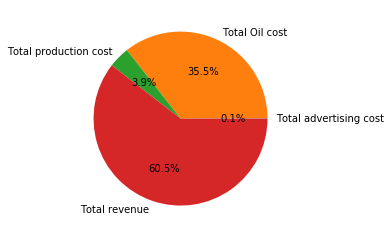

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
def display_pie(pie_values, pie_labels, colors=None):
    plt.axis("equal")
    plt.pie(pie_values, labels=pie_labels, colors=colors, autopct="%1.1f%%")
    plt.show()
    
print("KPIs: Revenue - Oil Cost - Production Cost")
                                                       
display_pie( [kpnv[1] for kpnv in all_kpis], [kpnv[0] for kpnv in all_kpis])

##### Production output

You see from the result of the following code that the most produced gasoline type is by far **regular**:


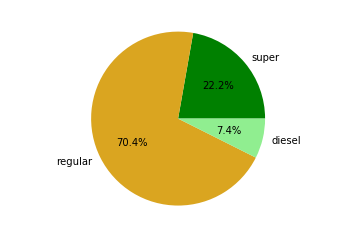

In [23]:
display_pie(total_gas_prods, gas_names, colors=["green", "goldenrod", "lightGreen"])



Now,  plot the breakdown of oil blend quantities per gasoline type.
You will use a multiple bar chart diagram that displays all blend values for each pairing of oil with a gasoline type.


In [24]:
sblends = [(gas_names[n], oil_names[o], round(blends[o,n].solution_value)) for n in range_gas for o in range_oil]

blends_bd = pd.DataFrame(sblends)

*** Blend Repartition ***


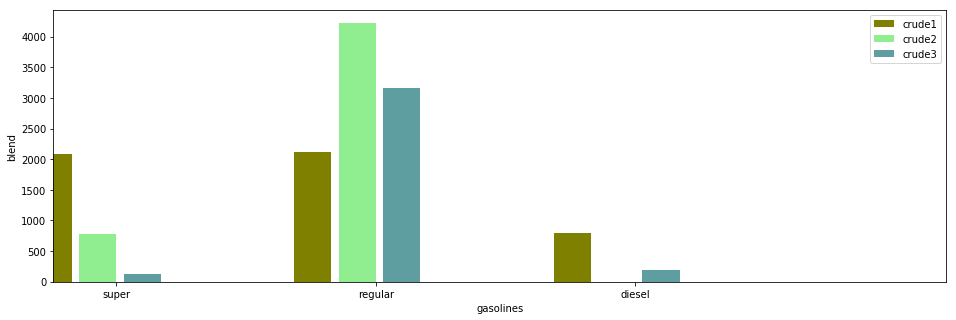

In [25]:
print("*** Blend Repartition ***")
f, barplot = plt.subplots(1, figsize=(16,5))

bar_width = 0.1
offset = 0.12
rho = 0.7

# position ofg left-bar boundaries
bar_l = [o for o in range_oil]

mbar_w = 3*bar_width+2*max(0, offset-bar_width)

tick_pos = [b*rho + mbar_w/2.0 for b in bar_l]

colors = ['olive', 'lightgreen', 'cadetblue']

for i in range_oil:
    barplot.bar([b*rho + (i*offset) for b in bar_l], 
                blend_values[i], width=bar_width, color=colors[i], label=oil_names[i])

plt.xticks(tick_pos, gas_names)
barplot.set_xlabel("gasolines")
barplot.set_ylabel("blend")
plt.legend(loc="upper right")
                                                                          

# Set a buffer around the edge
plt.xlim([0, max(tick_pos)+mbar_w +0.5])

plt.show()

<p class="alert alert-block alert-info"> Notice the missing bar for (crude2, diesel); this result is expected since blend[crude2, diesel] is zero in the solution.</p>


Check the solution value of blends for **crude2** and **diesel**; remember that **crude2** has offset 1 and **diesel** has offset 2.


<p class="alert alert-block alert-info"> You can see  how the decision variable is automatically converted to a floating point data type.  If you had run the report method before you submitted the solve method, this report would raise an exception since no solution value would be present.</p>


In [26]:
print("* value of blend[crude2, diesel] is %g" % blends[1,2])

* value of blend[crude2, diesel] is 0


## Summary

From the current model, you can see how much of each gasoline type,  with a particular quantity of each crude, that you can produce to get a maximized revenue of 830000 dollars.  You can change some of the constraints or the known variables to see different outcomes.  For example, increase the number of oil types, or change the initial cost of the fuel, then rerun the methods to present a different picture.





*****
# Thanks for completing this notebook!
*****
You learned how to:
* Set up and use the IBM Decision Optimization CPLEX Modeling for Python to help in a predictive analysis of maximizing oil profits.
* Explore data by using pandas DataFrame methods
* Plot data by using the matplotlib package
* Use the tools to make informed decisions from mathematical models.


Useful links:
- [CPLEX Modeling for Python documentation](https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html)
- [Decision Optimization on Cloud](https://developer.ibm.com/docloud/)
- [Prescriptive Analytics Cookbook](discovering_optimization.ipynb)
*****

Copyright © IBM 2017, 2018. This notebook and its source code are released under the terms of the MIT License.